# Example 2: Prediction

## WD & libraries

### Libraries

In [122]:
# Data manipulation
# ==============================================================================

import os 
import pandas as pd
import numpy as np
import operator
import joblib
from joblib import dump


# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

from sklearn.model_selection import train_test_split, learning_curve, validation_curve, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Modeling 
# ==============================================================================

from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

### Set Working Directory

In [95]:
# Set the working directory

workspace_directory = "/Users/oskyroski/DataScience/MachineLearning/2. Supervised Prediction"
os.chdir(workspace_directory)

## 0. Understand the business

In the realm of real estate, accurately predicting housing prices is not just a matter of economic interest but also of significant practical importance for both buyers and sellers in the market. This challenge encompasses various factors, including location, property features, market trends, and even broader economic indicators. The complexity and dynamic nature of these variables make housing price prediction a quintessential problem well-suited for Machine Learning (ML).

Machine Learning offers a robust framework for modeling and predicting housing prices by learning from historical data, recognizing patterns, and making informed predictions on unseen data. By employing ML algorithms, we can systematically account for the multifaceted relationships between numerous features and the final sale price. This not only enhances the accuracy of predictions but also provides insights into which factors most significantly impact housing values.

Furthermore, leveraging ML in housing price prediction empowers stakeholders with data-driven decision-making tools. For potential buyers, it helps in assessing the fair value of a property, ensuring they pay a reasonable price. For sellers, it aids in strategically setting house prices to maximize return while remaining competitive in the market. For investors and developers, understanding price determinants and future trends supports better investment and development strategies. Thus, the application of ML in this domain is a powerful enabler for making more transparent, fair, and efficient real estate transactions, benefiting all parties involved in the housing market.

## 1. Define the problem

### Data Description

The housing dataset comprises a comprehensive collection of features that potentially influence a house's sale price. These features include both numerical and categorical data types, ranging from basic attributes like the square footage of living space, number of bedrooms and bathrooms, to more nuanced characteristics such as the home's age, location specifics (e.g., proximity to key amenities or waterfront views), and condition grades. This rich dataset enables a detailed analysis of factors affecting housing prices, providing a solid foundation for predictive modeling.

### Objective

The primary objective is to develop a predictive model that can accurately estimate the sale price of houses based on their characteristics. By achieving high accuracy in price prediction, this model aims to serve as a decision support tool for potential buyers, sellers, and investors in the real estate market. The goal is to demystify the housing market's pricing mechanisms, making it more accessible and transparent for all stakeholders involved.

### Modeling Approaches

Several modeling approaches can be employed to tackle the housing price prediction problem, each with its strengths and applicable scenarios. Here are some potential methodologies:

1. Linear Regression: A baseline model that assumes a linear relationship between the features and the target variable. It's simple, interpretable, and provides a good starting point.
2. Polynomial Regression: Extends linear regression by considering polynomial features to capture non-linear relationships.
3. Decision Trees: Offer intuitive models that use a tree-like model of decisions and their possible consequences, handling both numerical and categorical data.
4. Random Forest: An ensemble of decision trees that improves prediction accuracy by reducing overfitting.
5. Gradient Boosting Machines (GBM): Sequentially builds weak models, typically decision trees, to correct errors made by previous models, often leading to superior accuracy.
6. XGBoost/LightGBM/CatBoost: Specialized gradient boosting frameworks that provide fast, efficient, and highly accurate models.
7. Support Vector Machines (SVM): Effective for high-dimensional spaces, SVMs can model complex, non-linear relationships.
8. K-Nearest Neighbors (KNN): A non-parametric method that predicts the value of a data point based on the weighted average of the k closest neighbors.
9. Neural Networks: Deep learning models that can capture complex non-linear relationships through layers of neurons. Particularly useful for capturing intricate patterns in large datasets.
10. Lasso/Ridge Regression: Linear models with regularization to prevent overfitting and manage multicollinearity.
11. Elastic Net: Combines features of Lasso and Ridge, adjusting the mix of regularization types for better performance.
12. Principal Component Regression (PCR): Combines Principal Component Analysis (PCA) with Linear Regression to deal with multicollinearity and high dimensionality.
13. Partial Least Squares Regression (PLSR): Similar to PCR, focuses on predicting the target variable while considering the direction with the highest variance.
14. Generalized Additive Models (GAMs): Extend linear models by allowing non-linear functions of the features while maintaining interpretability.

Each of these approaches has its considerations, such as the need for feature scaling, handling of categorical variables, and the trade-off between model complexity and interpretability. The choice of model will depend on the dataset's characteristics, the importance of interpretability, and the computational resources available.

## 2. Prepare the Data

### Data Gathering

In [96]:
# Load the CSV file
Housing = pd.read_csv("Housing.csv")

# print(Housing.head())

# Define the categorical columns
categorical_columns = [col for col in X.columns if col != 'area']

# Create a ColumnTransformer to transform the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ], remainder='passthrough'  # Leave the 'area' column unchanged
)

# Define the target variable (Y) and the feature matrix (X)
Y = Housing['price']
X = Housing.drop('price', axis=1)

### EDA 

#### Metrics

In [97]:
# Generate descriptive statistics
desc_stats = Housing.describe().transpose()

# Calculate mode for each feature
modes = Housing.mode().iloc[0]

# Count missing values for each feature
missing_values = Housing.isnull().sum()

# Adding mode and missing values to the descriptive statistics
desc_stats['mode'] = modes
desc_stats['missing_values'] = missing_values

# Display the descriptive statistics table
print(desc_stats)

           count          mean           std        min        25%        50%  \
price      545.0  4.766729e+06  1.870440e+06  1750000.0  3430000.0  4340000.0   
area       545.0  5.150541e+03  2.170141e+03     1650.0     3600.0     4600.0   
bedrooms   545.0  2.965138e+00  7.380639e-01        1.0        2.0        3.0   
bathrooms  545.0  1.286239e+00  5.024696e-01        1.0        1.0        1.0   
stories    545.0  1.805505e+00  8.674925e-01        1.0        1.0        2.0   
parking    545.0  6.935780e-01  8.615858e-01        0.0        0.0        0.0   

                 75%         max     mode  missing_values  
price      5740000.0  13300000.0  3500000               0  
area          6360.0     16200.0   6000.0               0  
bedrooms         3.0         6.0      3.0               0  
bathrooms        2.0         4.0      1.0               0  
stories          2.0         4.0      2.0               0  
parking          1.0         3.0      0.0               0  


##### Charts

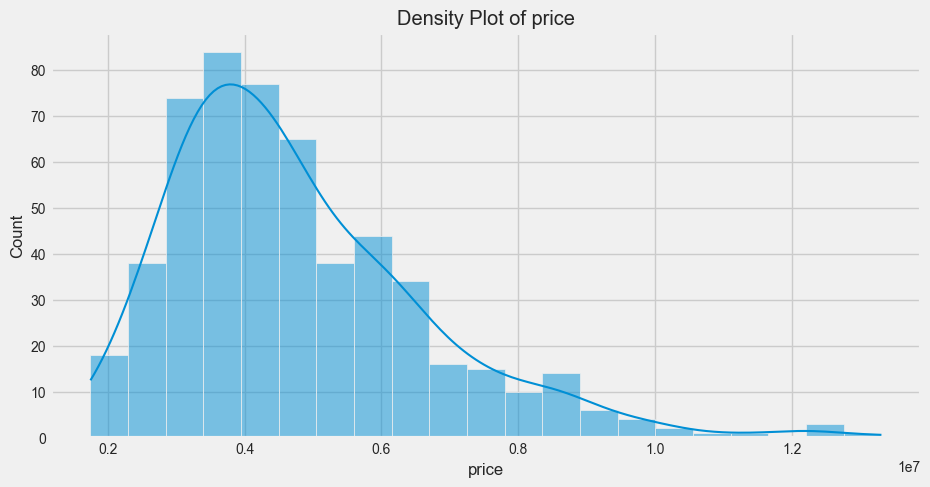

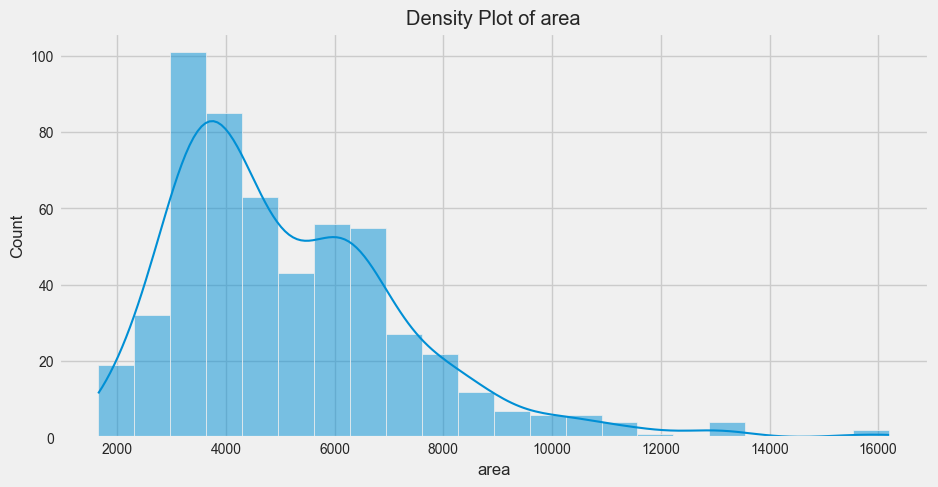

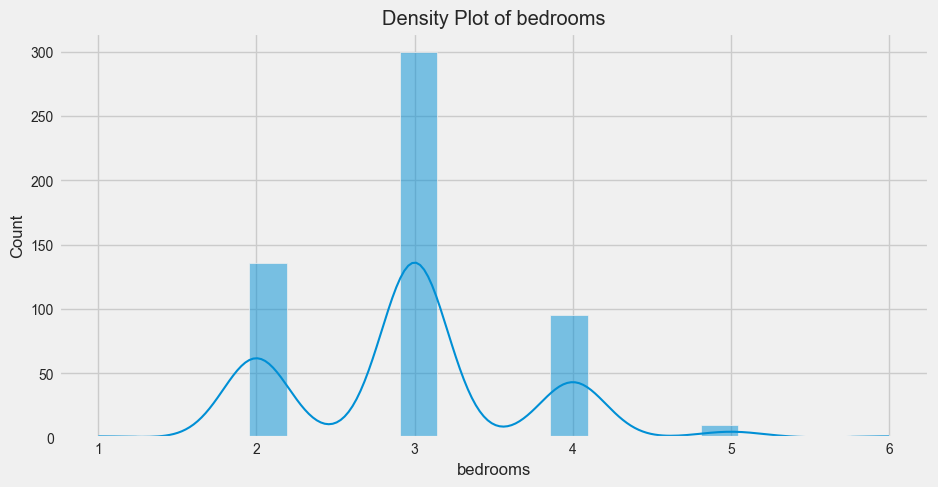

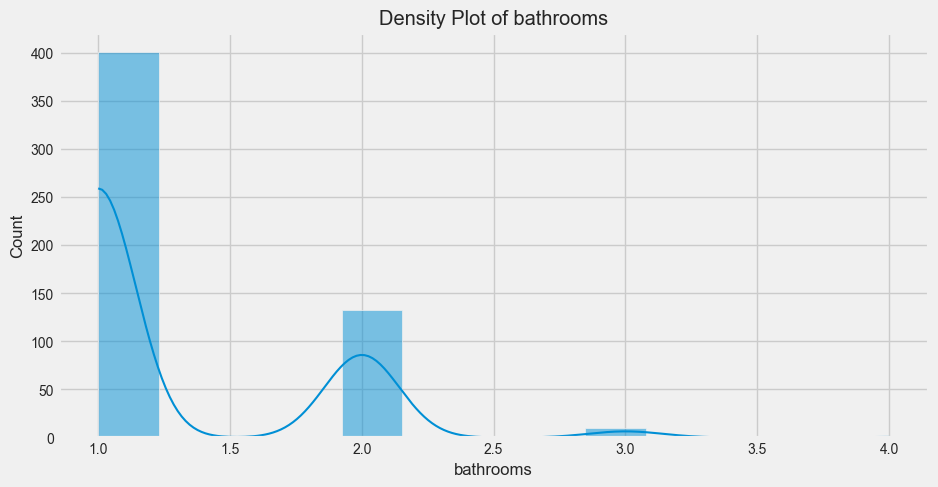

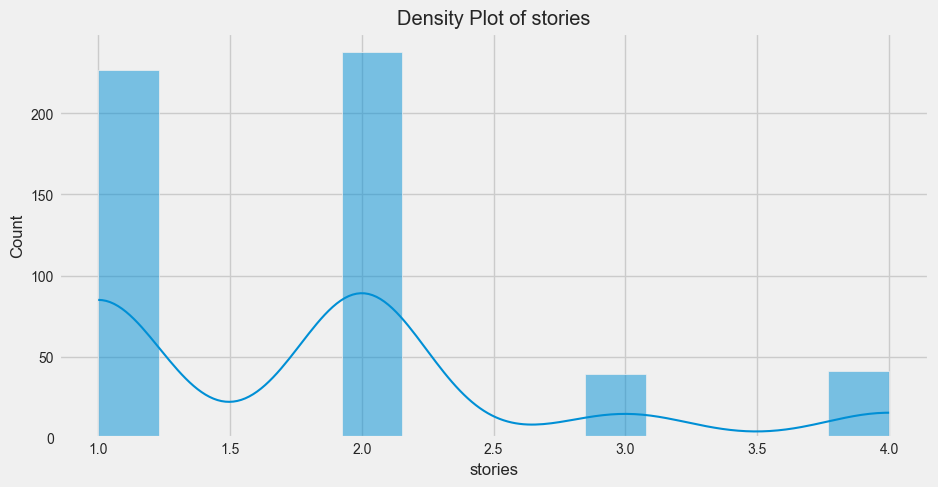

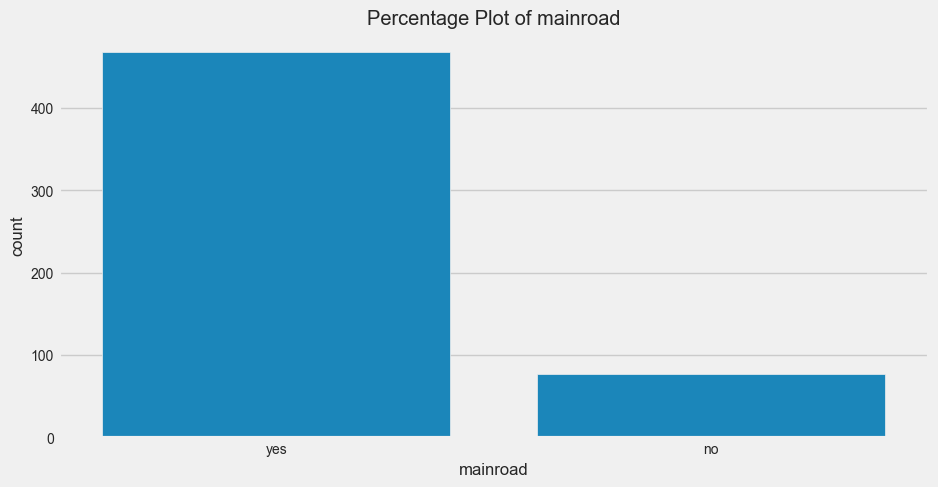

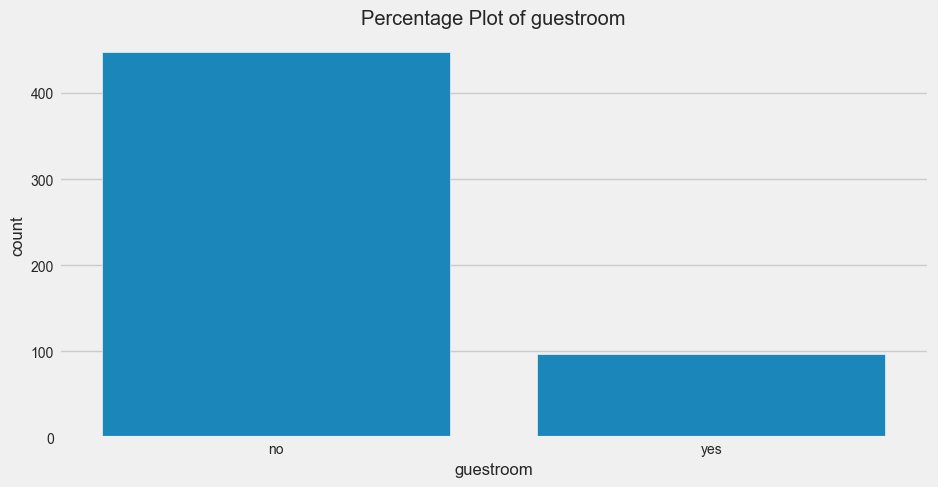

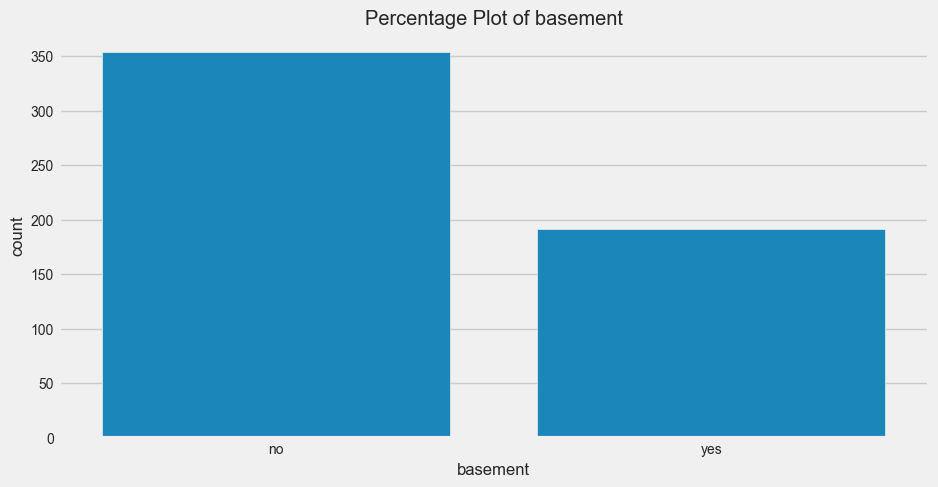

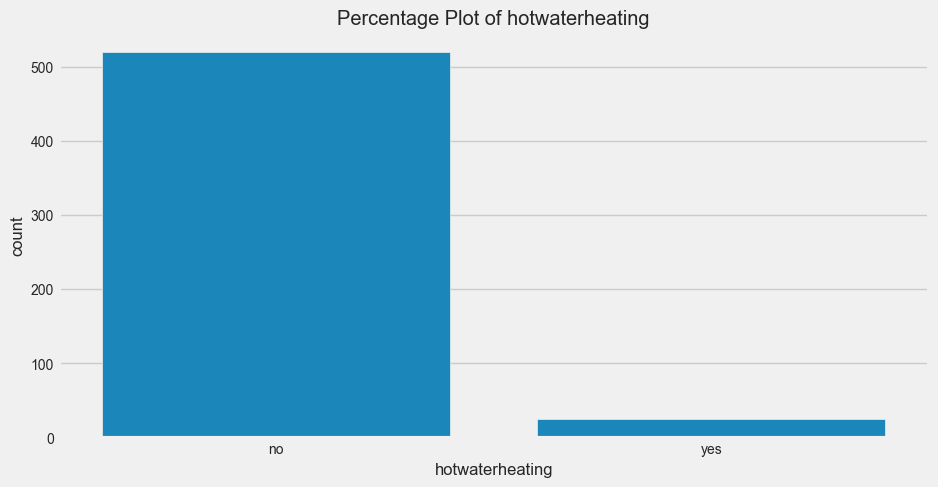

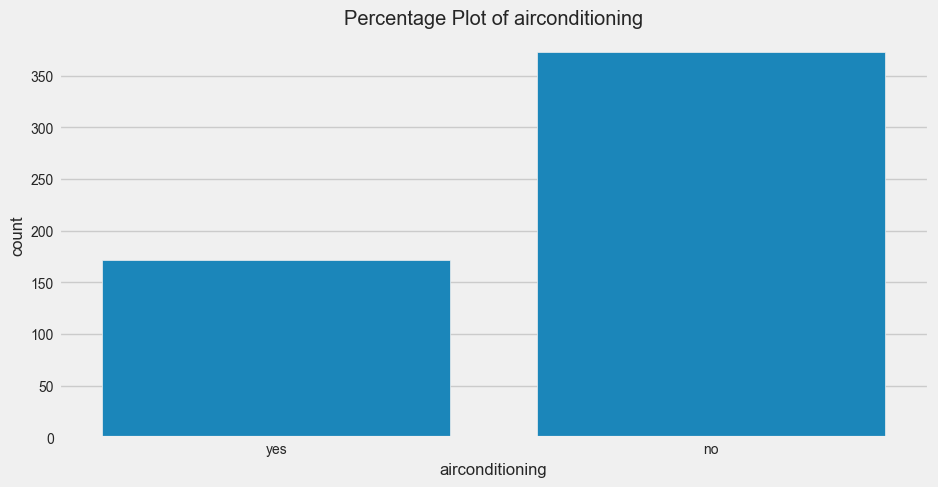

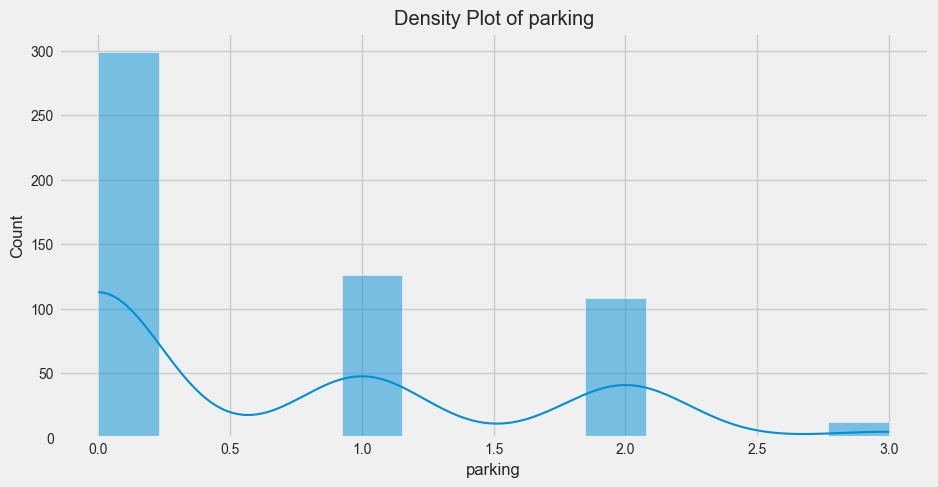

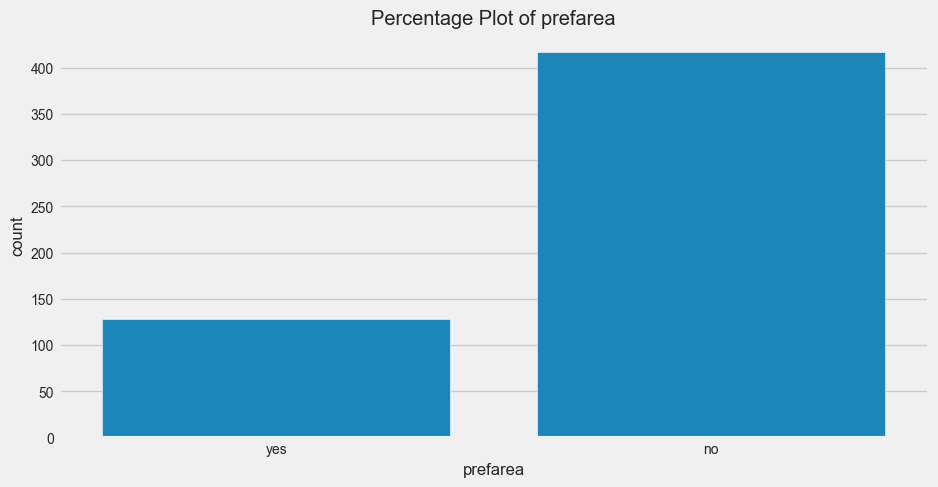

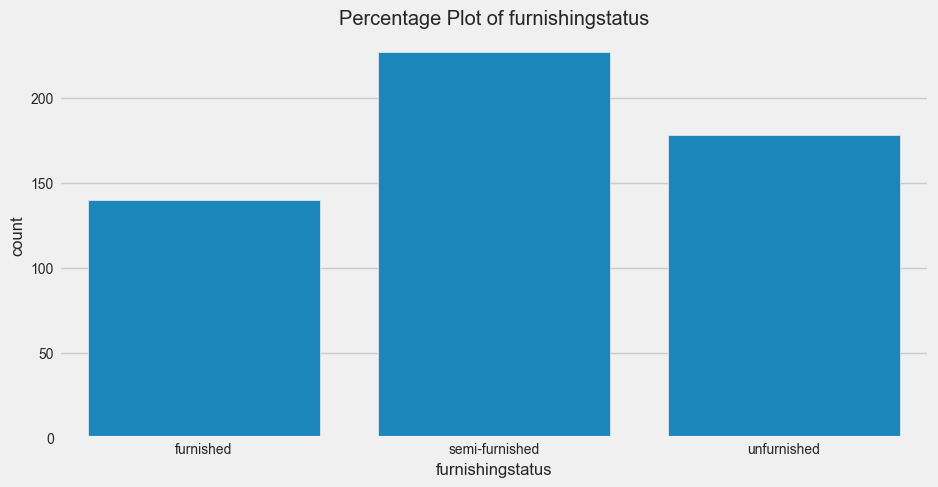

In [98]:
# Plotting cols
for column in Housing.columns:
    plt.figure(figsize=(10, 5))

    # If the column is numeric, plot a density plot
    if Housing[column].dtype != 'object':
        sns.histplot(Housing[column], kde=True)
        plt.title(f'Density Plot of {column}')

    # If the column is categorical, plot a count plot
    else:
        sns.countplot(x=column, data=Housing)
        plt.title(f'Percentage Plot of {column}')

    plt.show()

### Data Splitting

Let's split the data into  training/testing sets

In [99]:
# Splitting the data
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.25, random_state=89542)

# Calculate descriptive statistics and mode
train_desc = Y_train.describe(percentiles=[.25, .75])
valid_desc = Y_valid.describe(percentiles=[.25, .75])
train_mode = Y_train.mode()[0]
valid_mode = Y_valid.mode()[0]

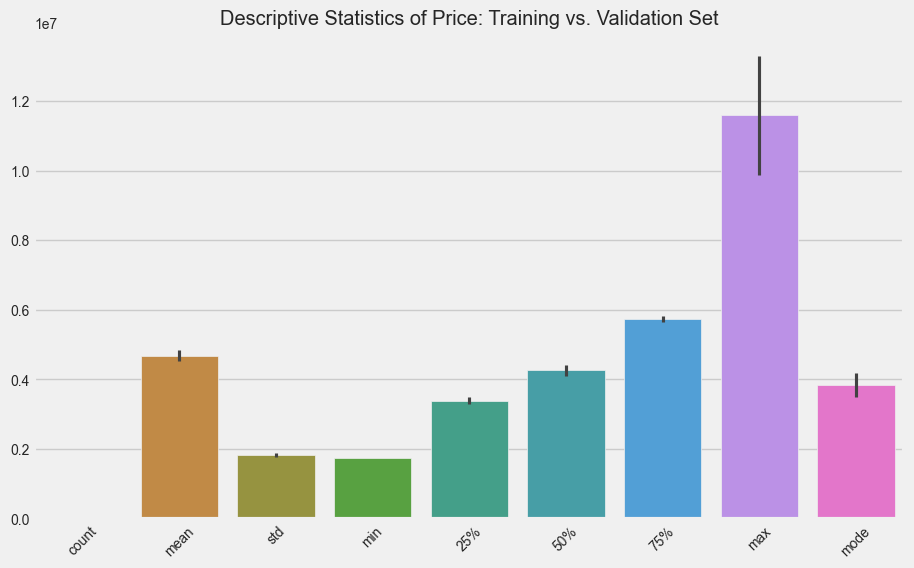

In [100]:
# Creating a DataFrame for comparative analysis
stats_comparison = pd.DataFrame({'Training Set': train_desc, 'Validation Set': valid_desc})
stats_comparison.loc['mode'] = [train_mode, valid_mode]  # Add mode

# Since I can't directly show the table, here's how you might visualize it
plt.figure(figsize=(10, 6))
sns.barplot(data=stats_comparison.transpose())
plt.title('Descriptive Statistics of Price: Training vs. Validation Set')
plt.xticks(rotation=45)
plt.show()

In [101]:
# Preparing the target variable Y and features X
Y = Housing['price']
X = Housing.drop('price', axis=1)

# Splitting the dataset
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.25, random_state=42)

# Calculate descriptive statistics for 'Price' in both sets and the mode
train_stats = Y_train.describe(percentiles=[.25, .75])
valid_stats = Y_valid.describe(percentiles=[.25, .75])
train_mode = Y_train.mode()[0]
valid_mode = Y_valid.mode()[0]

# Convert descriptive statistics Series to DataFrames
train_stats_df = train_stats.to_frame(name='Training Set')
valid_stats_df = valid_stats.to_frame(name='Validation Set')

# Add mode as a new row to each DataFrame
train_stats_df.loc['mode'] = [train_mode]
valid_stats_df.loc['mode'] = [valid_mode]

# Combine the training and validation stats into a single DataFrame for comparison
comparison_df = pd.concat([train_stats_df, valid_stats_df], axis=1)

# Display the DataFrame for comparison
comparison_df

,Training Set,Validation Set
count,4.080000e+02,1.370000e+02
mean,4.751249e+06,4.812830e+06
std,1.767499e+06,2.154561e+06
min,1.750000e+06,1.750000e+06
25%,3.500000e+06,3.234000e+06
50%,4.340000e+06,4.340000e+06
75%,5.600000e+06,6.195000e+06
max,1.225000e+07,1.330000e+07
mode,4.200000e+06,2.660000e+06


### Training vs validation

In [102]:
# Insert plot 

## 3. Choose a Model(s)

For predicting housing prices, which is a regression task, there are several machine learning models that can be effectively applied. Here's a list of 10 potential models, named as requested:

- Model 1 - Linear Regression: A simple yet powerful model for regression tasks. It assumes a linear relationship between the independent variables and the dependent variable.
- Model 2 - Ridge Regression: An extension of linear regression that includes L2 regularization, which can help prevent overfitting by penalizing large coefficients.
- Model 3 - Lasso Regression: Similar to Ridge Regression but uses L1 regularization, encouraging sparsity in the coefficients (i.e., leading to coefficients that can be exactly zero).
- Model 4 - Elastic Net Regression: Combines the properties of both Ridge and Lasso regression, using both L1 and L2 regularization, which can be especially useful if there are correlations among features.
- Model 5 - Decision Tree Regressor: A model that uses a decision tree to go from observations about an item to conclusions about the item's target value. It's capable of capturing complex non-linear relationships.
- Model 6 - Random Forest Regressor: An ensemble model that uses multiple decision trees to improve prediction accuracy and control over-fitting.
- Model 7 - Gradient Boosting Regressor: An ensemble technique that builds trees one at a time, where each new tree helps to correct errors made by previously trained trees.
- Model 8 - Support Vector Regressor (SVR): Based on the Support Vector Machine (SVM) algorithm, designed for regression tasks. It can handle both linear and non-linear regression through the use of different kernels.
- Model 9 - K-Neighbors Regressor: A non-parametric method that predicts the value of a data point by averaging the values of the k nearest neighbors.
- Model 10 - XGBoost Regressor: An implementation of gradient boosted decision trees designed for speed and performance. It's known for its efficiency in handling large datasets and high performance in predictive accuracy.

Each of these models has its strengths and can be applied to the housing price prediction problem. The choice of model might depend on the specific characteristics of your dataset, such as the number of features, the presence of non-linear relationships, and the size of the dataset. It's often beneficial to experiment with multiple models and compare their performance to select the best model for your specific task.

In [103]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Instantiating each model
model1 = LinearRegression()
model2 = Ridge()
model3 = Lasso()
model4 = ElasticNet()
model5 = DecisionTreeRegressor()
model6 = RandomForestRegressor()
model7 = GradientBoostingRegressor()
model8 = SVR()
model9 = KNeighborsRegressor()
model10 = XGBRegressor()



## 4. Train the Model

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [105]:
# Define categorical and continuous features
categorical_features = [col for col in X.columns if col != 'area']
continuous_features = ['area']

# Preprocessor for categorical and continuous data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('cont', StandardScaler(), continuous_features)  # Scale continuous features
    ])

# List of models to train
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('ElasticNet Regression', ElasticNet()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('Support Vector Regressor', SVR()),
    ('K-Neighbors Regressor', KNeighborsRegressor()),
    ('XGBRegressor', XGBRegressor(objective='reg:squarederror'))  # Note for XGB: use_label_encoder=False if needed
]

# Dictionary to store MSE scores for comparison
mse_scores = {}

# Training each model and evaluating on the validation set
for name, model in models:
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    pipeline.fit(X_train, Y_train)  # Fit the model with preprocessing
    Y_pred = pipeline.predict(X_valid)  # Predict on the validation set
    mse = mean_squared_error(Y_valid, Y_pred)  # Calculate MSE
    mse_scores[name] = mse  # Storing the MSE in the dictionary

# Sort and display the MSE scores in ascending order
sorted_mse_scores = dict(sorted(mse_scores.items(), key=lambda item: item[1]))
print("Sorted Model MSEs (from lowest to highest):")
for model_name, mse in sorted_mse_scores.items():
    print(f"{model_name}: {mse:.4f}")

Sorted Model MSEs (from lowest to highest):
Linear Regression: 1536337346908.6423
Lasso Regression: 1588848455742.4426
Ridge Regression: 1604152104178.3650
Gradient Boosting Regressor: 1770582326755.7163
K-Neighbors Regressor: 2031681413921.3140
Random Forest Regressor: 2065074713844.4275
ElasticNet Regression: 2199337247053.6553
XGBRegressor: 2219446167032.6162
Decision Tree Regressor: 3266738796514.5986
Support Vector Regressor: 4831748530203.1045


## 5. Evaluate the Model

Here are five common metrics used for this purpose:

Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
R-squared (R²)
Adjusted R-squared

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import pandas as pd

In [107]:
# Assuming 'area' is the only continuous feature and all others are categorical
categorical_features = [col for col in X.columns if col != 'area']
continuous_features = ['area']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('cont', StandardScaler(), continuous_features),
    ])

models = [
    ('Linear Regression', Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])),
    ('Ridge Regression', Pipeline(steps=[('preprocessor', preprocessor), ('model', Ridge())])),
    ('Lasso Regression', Pipeline(steps=[('preprocessor', preprocessor), ('model', Lasso())])),
    ('ElasticNet Regression', Pipeline(steps=[('preprocessor', preprocessor), ('model', ElasticNet())])),
    ('Decision Tree Regressor', Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeRegressor())])),
    ('Random Forest Regressor', Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor())])),
    ('Gradient Boosting Regressor', Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor())])),
    ('Support Vector Regressor', Pipeline(steps=[('preprocessor', preprocessor), ('model', SVR())])),
    ('K-Neighbors Regressor', Pipeline(steps=[('preprocessor', preprocessor), ('model', KNeighborsRegressor())])),
    ('XGBRegressor', Pipeline(steps=[('preprocessor', preprocessor), ('model', XGBRegressor(objective='reg:squarederror'))])),
]

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Assuming you have defined X_train, X_valid, Y_train, Y_valid, and models list

evaluation_metrics = {}

# Loop through each model, fit it on the training set, then predict and calculate metrics on the validation set
for model_name, model in models:
    # Fit the model on the training set
    model.fit(X_train, Y_train)  # Ensure X_train and Y_train are correctly defined and preprocessed
    
    # Predict on the validation set
    y_pred = model.predict(X_valid)  # Ensure X_valid is correctly preprocessed for prediction
    
    # Calculate metrics
    mae = mean_absolute_error(Y_valid, y_pred)
    mse = mean_squared_error(Y_valid, y_pred)
    rmse_val = rmse(Y_valid, y_pred)
    r2 = r2_score(Y_valid, y_pred)
    adj_r2 = 1 - (1-r2) * (len(Y_valid)-1) / (len(Y_valid)-X_valid.shape[1]-1)
    
    # Store metrics in the dictionary
    evaluation_metrics[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse_val, 'R2': r2, 'Adjusted R2': adj_r2}

# Convert the evaluation metrics into a DataFrame for easier display
evaluation_metrics_df = pd.DataFrame.from_dict(evaluation_metrics, orient='index')

# Display the DataFrame
evaluation_metrics_df

,MAE,MSE,RMSE,R2,Adjusted R2
Linear Regression,8.936410e+05,1.536337e+12,1.239491e+06,0.666611,0.634348
Ridge Regression,9.145304e+05,1.604152e+12,1.266551e+06,0.651895,0.618208
Lasso Regression,9.053506e+05,1.588848e+12,1.260495e+06,0.655216,0.621850
ElasticNet Regression,1.098049e+06,2.199337e+12,1.483016e+06,0.522739,0.476552
Decision Tree Regressor,1.250882e+06,3.245897e+12,1.801637e+06,0.295633,0.227468
Random Forest Regressor,9.764569e+05,1.934325e+12,1.390800e+06,0.580247,0.539626
Gradient Boosting Regressor,9.547336e+05,1.786970e+12,1.336776e+06,0.612223,0.574697
Support Vector Regressor,1.659448e+06,4.831749e+12,2.198124e+06,-0.048500,-0.149968
K-Neighbors Regressor,1.012643e+06,2.031681e+12,1.425371e+06,0.559121,0.516455
XGBRegressor,1.018483e+06,2.219446e+12,1.489781e+06,0.518375,0.471766


# Plots

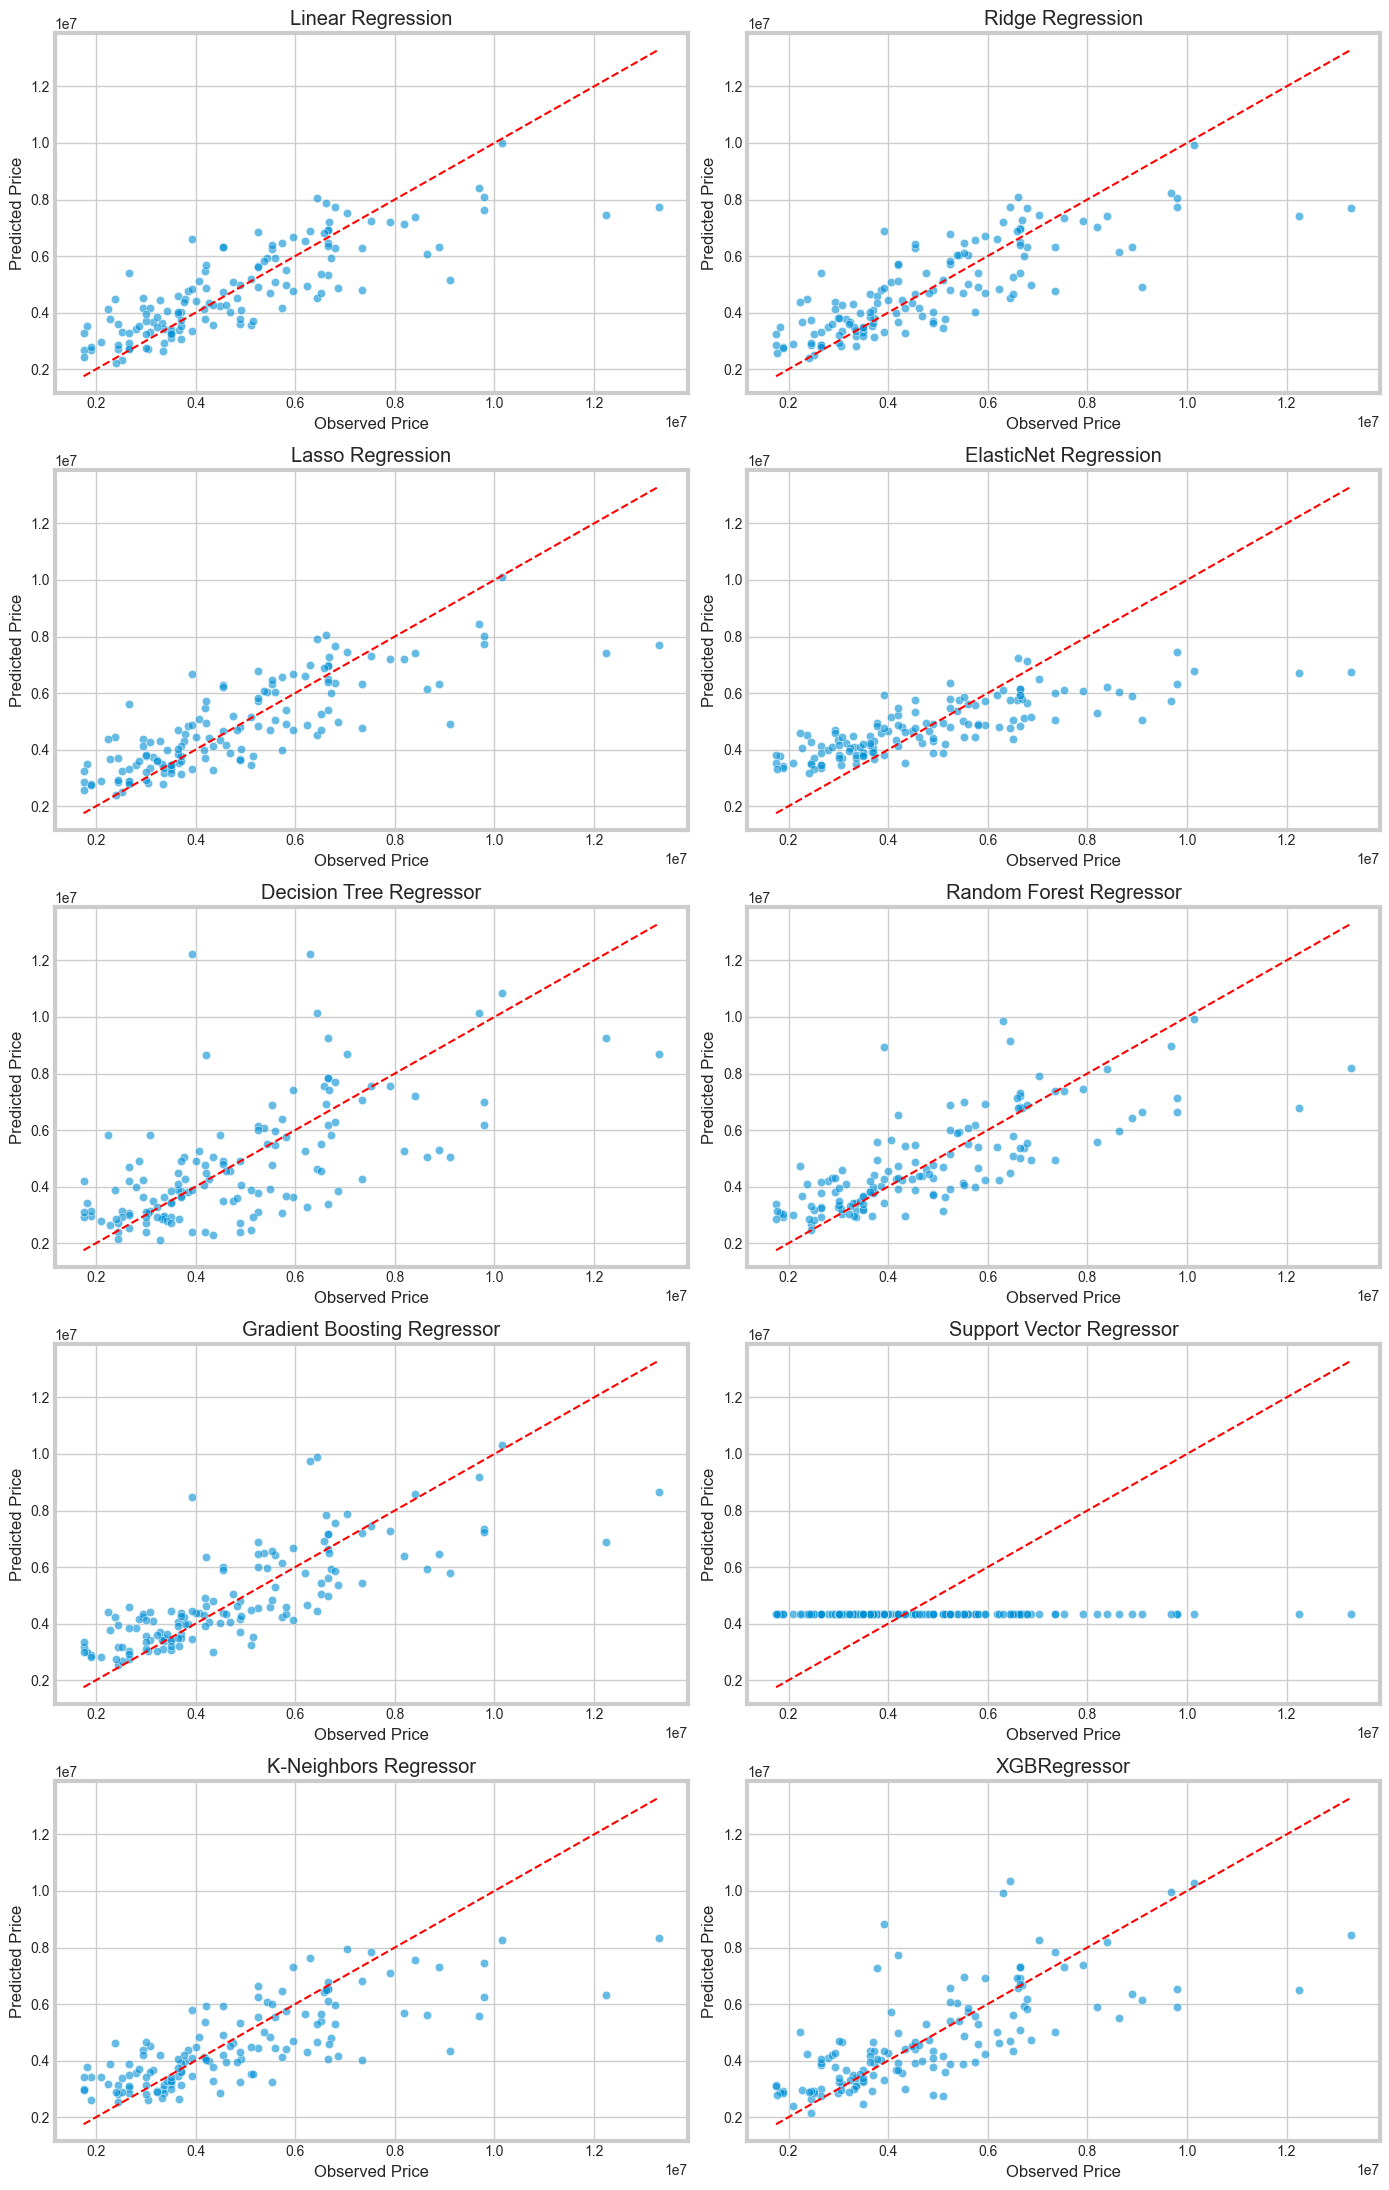

In [108]:

sns.set_style("whitegrid")

# Creating subplots for each model
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 22))
axes = axes.flatten()  # Flatten the array to iterate easily

for i, (model_name, model) in enumerate(models):
    # Generate predictions
    y_pred = model.predict(X_valid)
    
    # Scatter plot for observed vs. predicted values
    sns.scatterplot(x=Y_valid, y=y_pred, ax=axes[i], alpha=0.6)
    axes[i].plot([Y_valid.min(), Y_valid.max()], [Y_valid.min(), Y_valid.max()], '--r')  # Diagonal line
    axes[i].set_xlabel('Observed Price')
    axes[i].set_ylabel('Predicted Price')
    axes[i].set_title(f'{model_name}')

# Adjust layout
plt.tight_layout()
plt.show()

### Learning curves

In [109]:
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    # Calculate mean and standard deviation for training set scores
    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    
    # Calculate mean and standard deviation for validation set scores
    validation_scores_mean = -validation_scores.mean(axis=1)
    validation_scores_std = validation_scores.std(axis=1)
    
    plt.figure(figsize=(8, 5))
    plt.title(f'Learning Curve: {model_name}')
    plt.xlabel('Training Examples')
    plt.ylabel('MSE')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, color='r', alpha=0.1)
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, color='g', alpha=0.1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='g', label='Validation score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

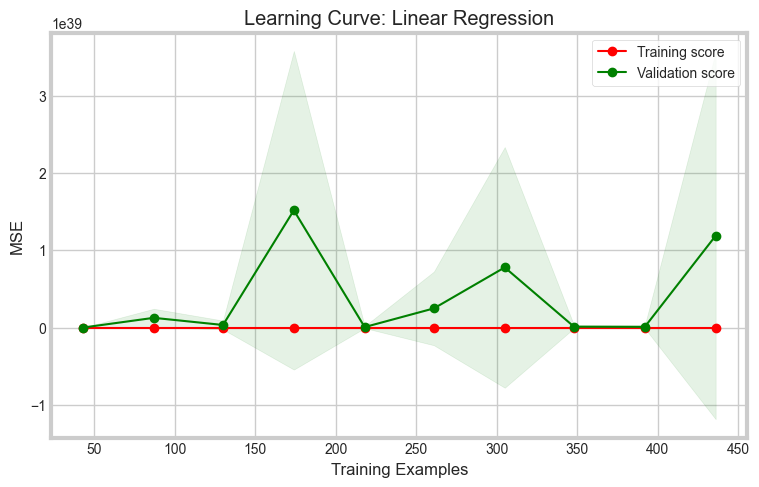

In [110]:
# Example usage for the Linear Regression model
plot_learning_curve(models[0][1], X, Y, 'Linear Regression')

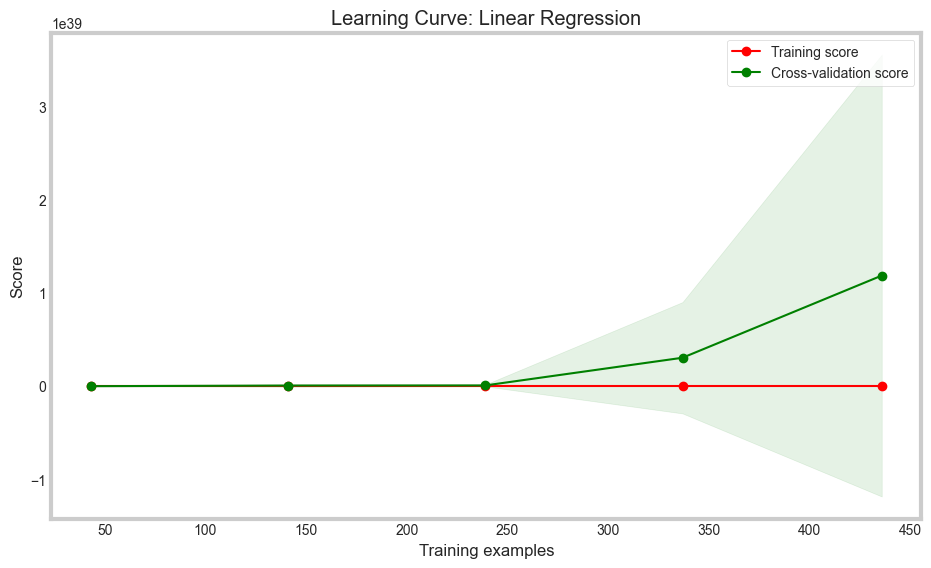

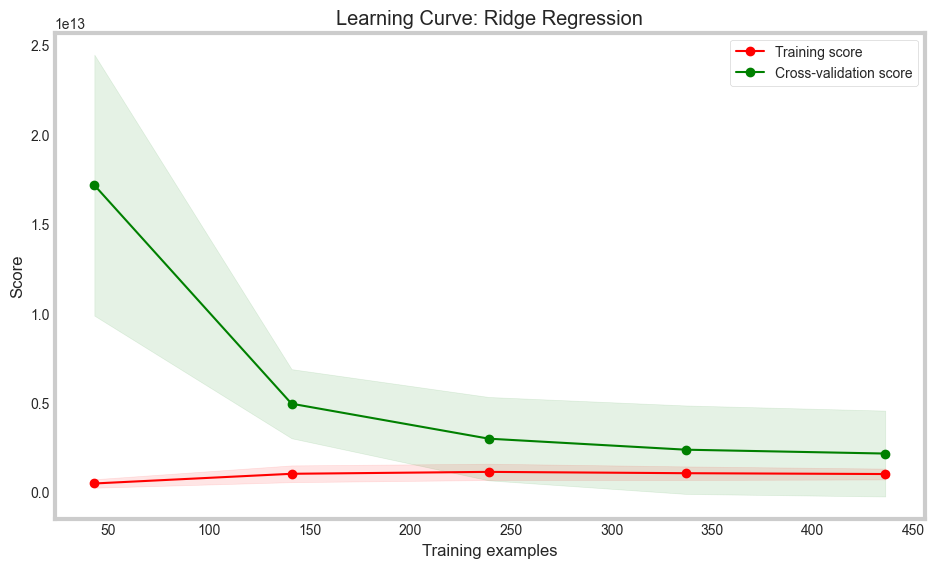

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.751e+09, tolerance: 1.200e+08
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.560e+11, tolerance: 3.150e+09
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

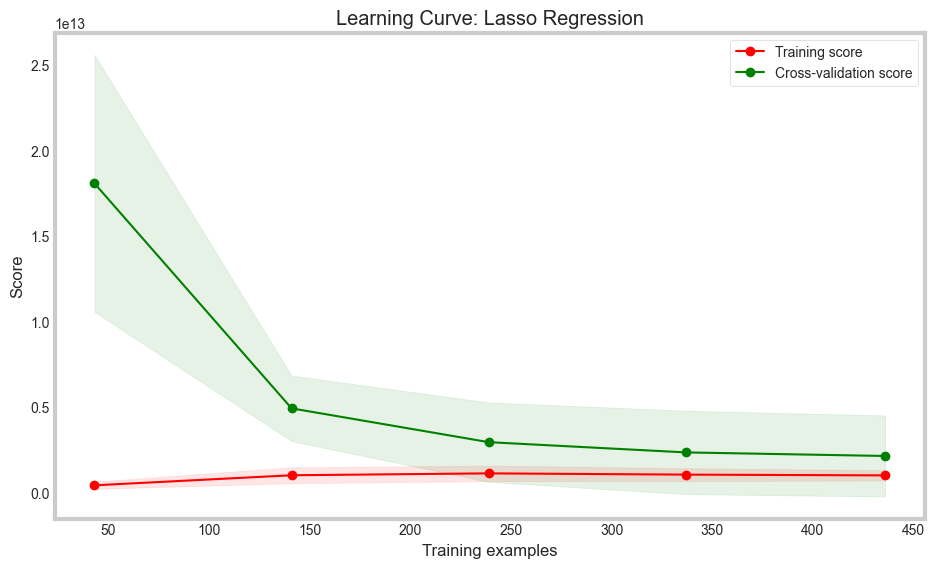

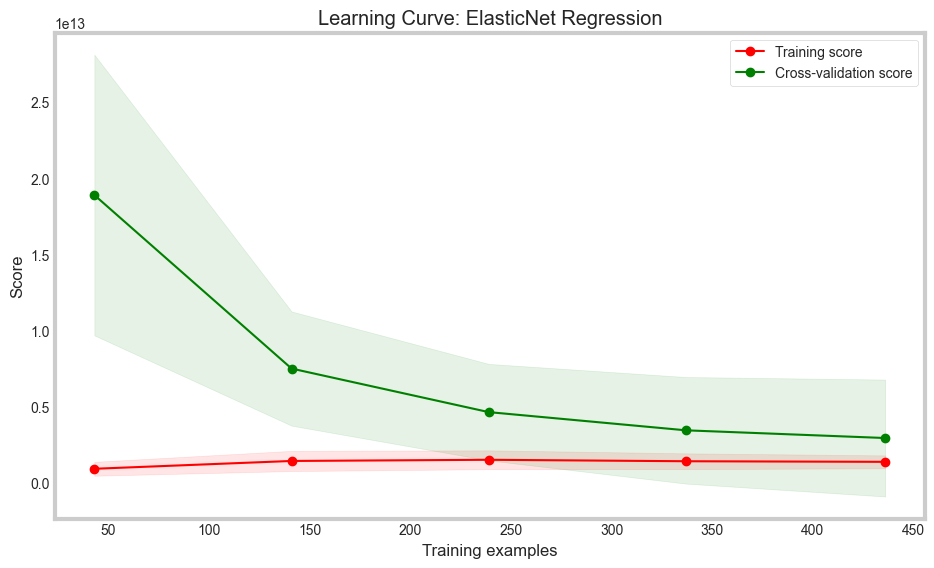

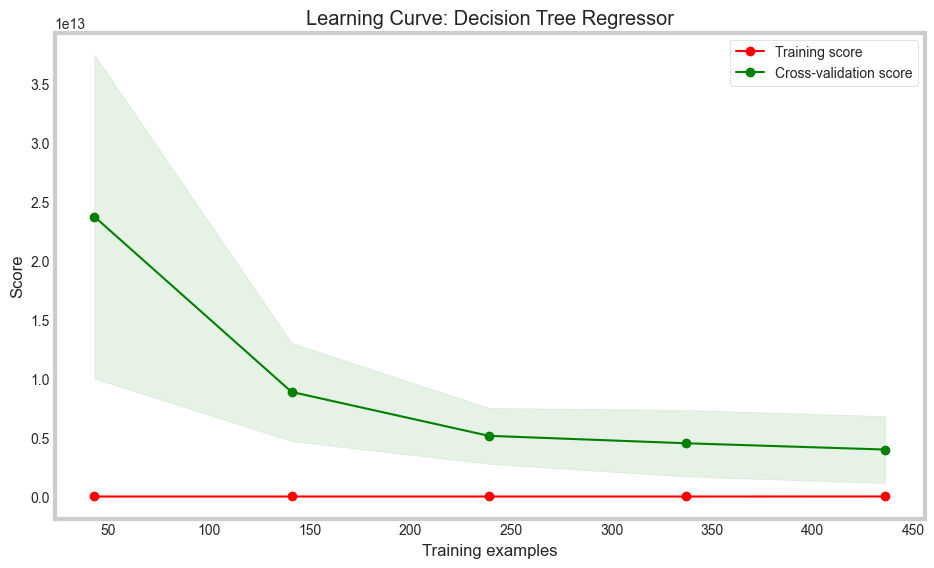

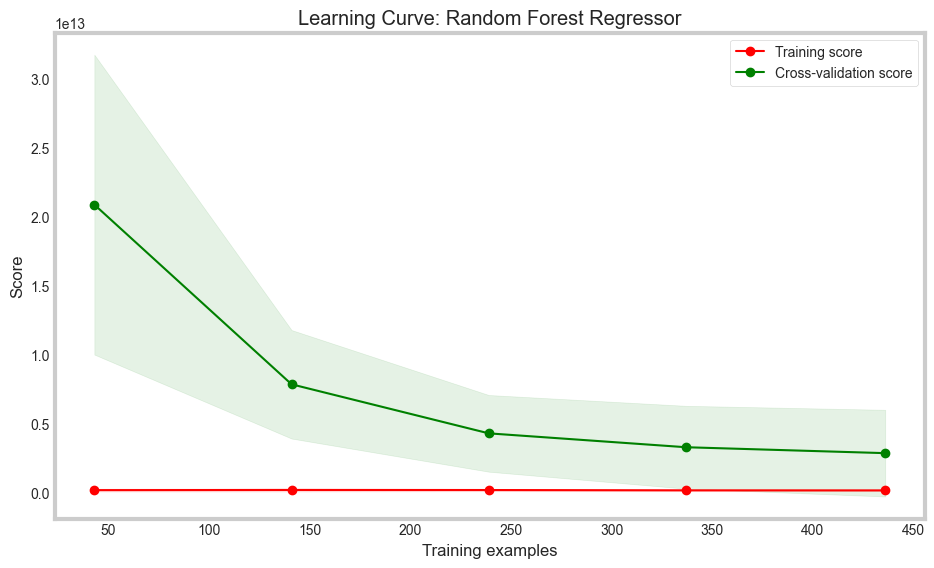

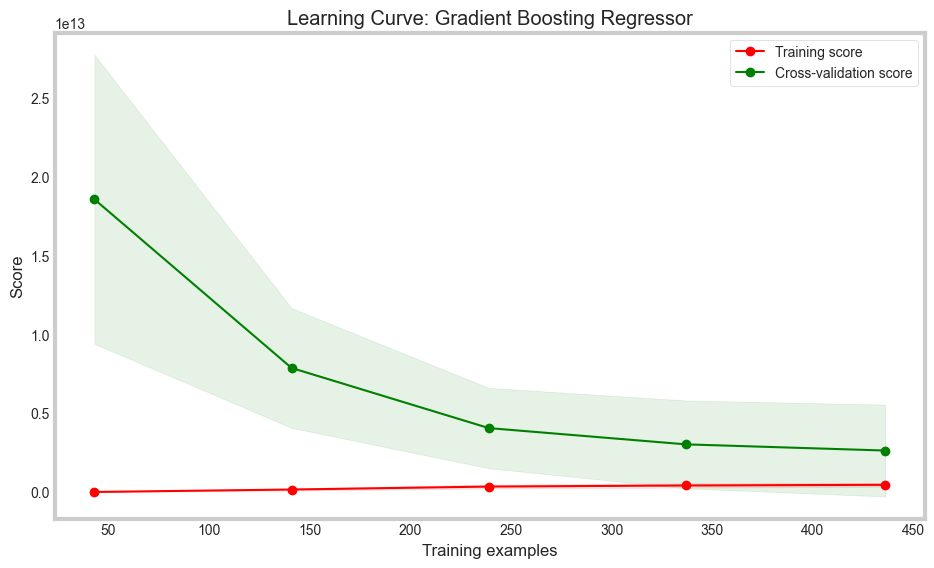

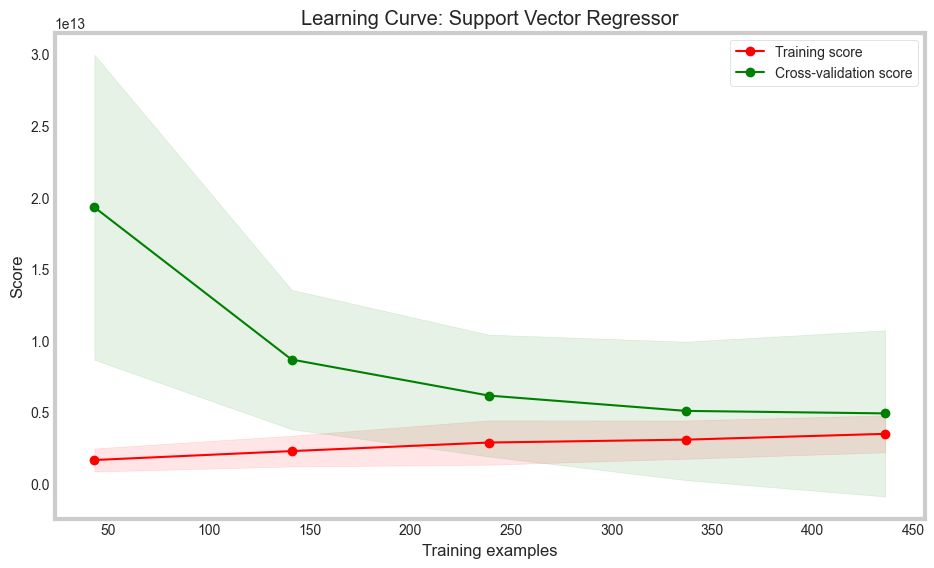

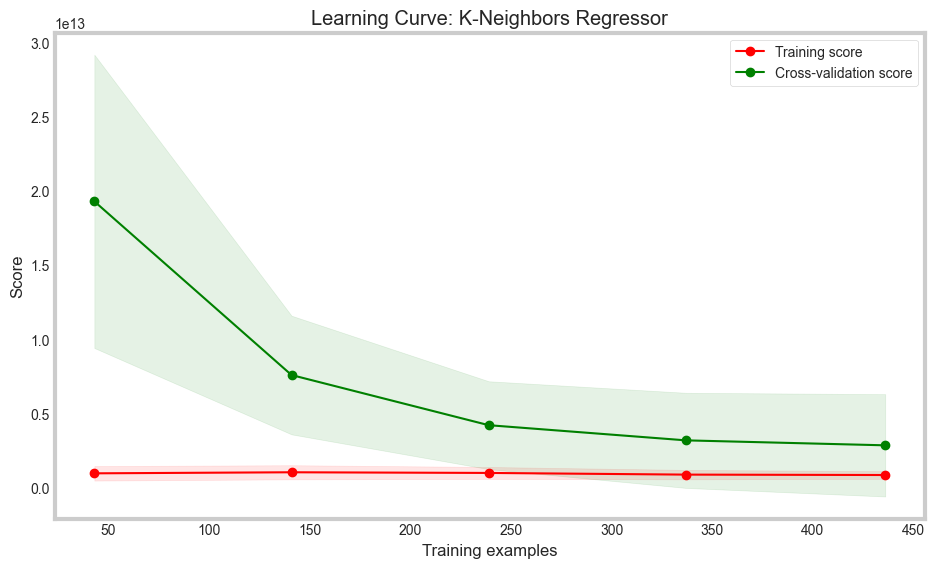

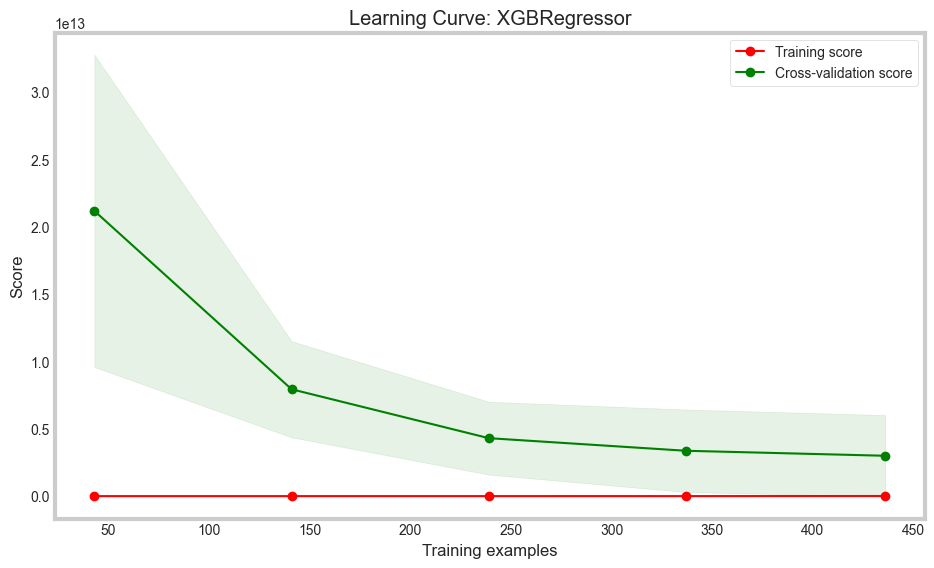

In [111]:
def plot_learning_curve(model, X, y, model_name, cv=5, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    model : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    
    title : string
        Title for the chart.
    
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.
    
    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors.
    
    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(10, 6))
    plt.title(f'Learning Curve: {model_name}')
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='neg_mean_squared_error')
    train_scores_mean = np.mean(-train_scores, axis=1)
    train_scores_std = np.std(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    test_scores_std = np.std(-test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Now iterate over all models to plot learning curves
for model_name, model_pipeline in models:
    plot_learning_curve(model_pipeline, X, Y, model_name, cv=5, n_jobs=-1)
    plt.show()


## 6. Parameter Tuning

Parameter tuning, often referred to as hyperparameter optimization, is a critical process in machine learning that involves finding the most effective combination of hyperparameters for a given model. These hyperparameters are external configurations to the model and cannot be learned from the data; instead, they are set prior to the training process and have a significant impact on the performance of the model. Unlike model parameters, which are learned automatically during training, hyperparameters must be assigned values by the practitioner. The goal of parameter tuning is to identify the hyperparameters that yield the best model performance, typically measured against a validation set.

One common method to visualize the effect of one or two hyperparameters on model performance is through validation curves. A validation curve plots the training and validation scores (such as accuracy, mean squared error, etc.) obtained by a model on the y-axis against varying values of a hyperparameter on the x-axis. By analyzing these curves, one can discern the hyperparameter values that lead to the best trade-off between bias and variance, avoiding overfitting and underfitting. Ideally, you want to select hyperparameters that maximize model performance on unseen data, indicated by high scores on the validation set.

However, hyperparameter tuning can be a time-consuming process, especially when dealing with complex models or large datasets, as it requires training multiple models with different combinations of hyperparameters to evaluate their performance. Furthermore, after identifying the optimal hyperparameters, it's essential to reevaluate the model using these settings against various performance metrics to ensure its effectiveness across different aspects of the task at hand.

Given the potentially lengthy nature of this process, while it's beneficial to conduct parameter tuning for all models in a comparative study, we'll focus specifically on the case of regression for illustration purposes. This focused approach allows us to delve into the nuances of hyperparameter optimization for a regression model, demonstrating how to navigate the search for optimal settings and interpret the implications of these settings on model performance.

In [113]:
# Define categorical and continuous features as before
categorical_features = [col for col in X.columns if col != 'area']
continuous_features = ['area']

# Preprocessor for categorical and continuous data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('cont', StandardScaler(), continuous_features),
    ])

# Define the model pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', RandomForestRegressor())])

# Define the parameter grid to search over
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
}

# Setup the grid search
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X, Y)

print("Best parameters found:")
print(grid_search.best_params_)

print("Best cross-validation score (negative MSE):")
print(grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:
{'regressor__max_depth': 30, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
Best cross-validation score (negative MSE):
-2804720454470.463


### Validation curve

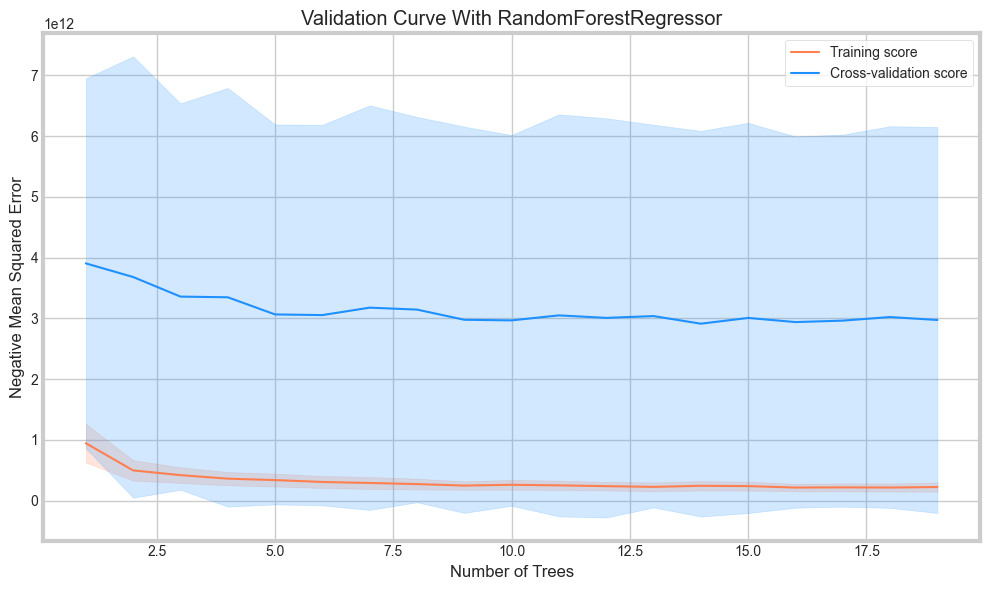

In [115]:
# Define the range of values for the hyperparameter
param_range = np.arange(1, 20, 1)

# Calculate scores for both the training and test sets
train_scores, test_scores = validation_curve(
    estimator=model_pipeline, 
    X=X, 
    y=Y, 
    param_name='regressor__n_estimators', 
    param_range=param_range,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

# Plot the validation curves
plt.subplots(1, 1, figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="coral")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="coral", alpha=0.2)
plt.plot(param_range, test_mean, label="Cross-validation score", color="dodgerblue")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="dodgerblue", alpha=0.2)

plt.title("Validation Curve With RandomForestRegressor")
plt.xlabel("Number of Trees")
plt.ylabel("Negative Mean Squared Error")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Chosen model

In [123]:
final_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=10))])

final_model.fit(X, Y)

# Save the model to disk
model_filename = 'random_forest_regressor_10_trees.joblib'
joblib.dump(final_model, model_filename)

# Save the model to disk
model_filename = 'random_forest_regressor_10_trees.joblib'
joblib.dump(final_model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as random_forest_regressor_10_trees.joblib


In [125]:
# Load the model from disk
loaded_model = joblib.load(model_filename)
loaded_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['bedrooms', 'bathrooms',
                                                   'stories', 'mainroad',
                                                   'guestroom', 'basement',
                                                   'hotwaterheating',
                                                   'airconditioning', 'parking',
                                                   'prefarea',
                                                   'furnishingstatus']),
                                                 ('cont', StandardScaler(),
                                                  ['area'])])),
                ('regressor', RandomForestRegressor(n_estimators=10))])

## 7. Make Prediction

### Simulate data for 'area' (as a continuous feature)

In [128]:
# Simulate numerical features
simulated_numerical_data = {
    'area': np.random.randint(2000, 15000, size=20),  # Random integers for area
    'bedrooms': np.random.randint(1, 5, size=20),  # Random number of bedrooms
    'bathrooms': np.random.randint(1, 4, size=20),  # Random number of bathrooms
    'stories': np.random.randint(1, 4, size=20),  # Random number of stories
    'parking': np.random.randint(0, 4, size=20),  # Random number of parking spaces
}

# Simulate categorical features with binary values (yes/no)
simulated_categorical_data = {
    'mainroad': np.random.choice(['yes', 'no'], size=20),
    'guestroom': np.random.choice(['yes', 'no'], size=20),
    'basement': np.random.choice(['yes', 'no'], size=20),
    'hotwaterheating': np.random.choice(['yes', 'no'], size=20),
    'airconditioning': np.random.choice(['yes', 'no'], size=20),
    'prefarea': np.random.choice(['yes', 'no'], size=20),
}

# Simulate categorical feature with more than two categories
furnishing_status_categories = ['furnished', 'semi-furnished', 'unfurnished']
simulated_categorical_data['furnishingstatus'] = np.random.choice(furnishing_status_categories, size=20)

# Combine the numerical and categorical simulated data
simulated_data = {**simulated_numerical_data, **simulated_categorical_data}

# Convert to DataFrame
simulated_data_df = pd.DataFrame(simulated_data)

# Display the simulated dataset
simulated_data_df.head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,12873,2,2,3,2,no,no,yes,yes,yes,yes,furnished
1,14372,4,1,3,3,no,no,no,no,no,yes,furnished
2,4251,1,3,1,1,yes,no,no,yes,no,yes,furnished
3,6420,4,3,3,0,yes,yes,yes,yes,no,no,unfurnished
4,9108,2,3,1,0,no,yes,no,no,no,no,semi-furnished


### Load the Saved Model and Make Predictions

In [131]:

predictions = loaded_model.predict(simulated_data_df)

# Display the predictions
predicted_prices = pd.DataFrame(predictions, columns=['Predicted Price'])

# Add the predicted prices to the DataFrame
simulated_data_df['price'] = predictions

# Ensure 'price' is the first column if required
column_order = ['price'] + [col for col in simulated_data_df.columns if col != 'price']
simulated_data_with_predictions = simulated_data_df[column_order]

simulated_data_with_predictions.head()  # Display the first few rows with the predicted prices




,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,9698500.0,12873,2,2,3,2,no,no,yes,yes,yes,yes,furnished
1,5818400.0,14372,4,1,3,3,no,no,no,no,no,yes,furnished
2,5957000.0,4251,1,3,1,1,yes,no,no,yes,no,yes,furnished
3,8294300.0,6420,4,3,3,0,yes,yes,yes,yes,no,no,unfurnished
4,7843500.0,9108,2,3,1,0,no,yes,no,no,no,no,semi-furnished


## 8.ML Ops

Machine Learning Operations (MLOps) involves the process of taking an experimental model into a production web service and automating as much of this process as possible. Each cloud provider has their own tools and services for deploying machine learning models. Below is an outline of the steps for Azure, AWS, and GCP, along with a brief introduction to the relevant services.

### Azure

Azure Machine Learning service provides a cloud-based environment you can use to train, deploy, automate, manage, and track ML models.

Register the Model: Save your trained model to your Azure ML workspace.
Define the Scoring Script: Create a scoring script that uses the model to predict and return results.
Define the Environment: Specify the environment where your model will be run, including dependencies.
Configure the Deployment: Choose compute type and other settings for deploying your model.
Deploy the Model: Deploy your model as a web service.
Consume the Model: Interact with the deployed model via HTTP requests.


In [ ]:
from azureml.core import Workspace
from azureml.core.model import Model

# Connect to your Azure ML workspace
workspace = Workspace.get(name="your-ml-workspace", subscription_id='your-subscription-id', resource_group='your-resource-group')

# Register the model
model = Model.register(model_path="path_to_your_model/random_forest_regressor_10_trees.joblib",
                       model_name="random_forest_regressor",
                       workspace=workspace)

### AWS

Amazon Web Services offers Amazon SageMaker for deploying machine learning models at scale.

Create a Model in SageMaker: Upload your model to an S3 bucket and create a model in SageMaker.
Create Endpoint Configuration: Specify hardware and software configurations for your endpoint.
Create an HTTPS Endpoint: Deploy the model to the configured endpoint.
Invoke the Endpoint: Send data to the endpoint to get inferences.

In [ ]:
import boto3
import sagemaker

# Create a sagemaker client
sagemaker_client = boto3.client('sagemaker')

# Upload the model to S3
s3_client = boto3.client('s3')
with open("path_to_your_model/random_forest_regressor_10_trees.joblib", "rb") as f:
    s3_client.upload_fileobj(f, "your-bucket-name", "model.joblib")

# Create model in SageMaker
# ... (continued)


### GCP

Google Cloud Platform offers AI Platform for deploying machine learning models.

Upload the Model to Google Cloud Storage: Store your trained model in a storage bucket.
Create a Model Resource: Define a model resource in AI Platform.
Create a Model Version: Deploy a version using the uploaded model.
Use the Model for Prediction: Make prediction requests against your deployed model.


In [ ]:
from google.cloud import storage
from google.cloud import aiplatform

# Initialize the client
storage_client = storage.Client()

# Upload the model to GCP Storage
bucket = storage_client.bucket('your-bucket-name')
blob = bucket.blob('model/random_forest_regressor_10_trees.joblib')
blob.upload_from_filename('path_to_your_model/random_forest_regressor_10_trees.joblib')

# Deploy the model in AI Platform
# ... (continued)


For each cloud provider, you would need to use their specific CLI tools or SDKs, and these outlines would be run in their respective cloud environments or using the CLI configured with your account. Actual implementation would involve additional steps and configurations specific to your model, application, and the cloud provider's services. Make sure to consult the official documentation of Azure ML, Amazon SageMaker, and Google AI Platform for detailed instructions and best practices.

## Session information

In [112]:
import session_info
session_info.show(html=False)

-----
joblib              1.3.2
matplotlib          3.8.3
numpy               1.26.1
pandas              2.1.1
seaborn             0.13.2
session_info        1.0.0
sklearn             1.4.1.post1
xgboost             2.0.3
-----
IPython             8.16.1
jupyter_client      8.5.0
jupyter_core        5.4.0
-----
Python 3.11.6 (v3.11.6:8b6ee5ba3b, Oct  2 2023, 11:18:21) [Clang 13.0.0 (clang-1300.0.29.30)]
macOS-13.5.2-x86_64-i386-64bit
-----
Session information updated at 2024-03-29 17:46
